In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel('../mf/all-equity-excluding-sector-funds-2020.xlsx', skiprows=5, index_col=0)

Categories

1. equity-large-cap - EQ-LC
2. equity-large-and-midcap - EQ-L&MC
3. equity-multi-cap - EQ-MLC
4. equity-value - EQ-VAL
5. equity-elss - EQ-ELSS
6. equity-mid-cap - EQ-MC
7. equity-small-cap - EQ-SC

Returns are from year 2014 to 2020.

In [4]:
file = df[df['Category'] == 'EQ-MLC']

In [5]:
def mf_selector(file, year_from, year_to, threshold=3, percentile=50):
    """
        file: file
        years_from, years_to: 2014 to 2020
    """
    
#     df = pd.read_excel(file, skiprows=5, index_col=0)
#     df = df[df['Category'] == category]
    df = file
    df = df.apply(lambda c : pd.to_numeric(c, errors='coerce'))
    df = df.loc[:, [i for i in range(year_from, year_to+1)]].dropna(thresh=threshold)

    
    dfdr = df.rank(axis=0, ascending = True)/df.count()
    
    # Funds within given percentile
    top_percentile = (dfdr[dfdr>=(percentile/100)].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)
    top_percentile.name = 'top_percentile'
    
    # average percentage rank
    dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)
    average_rank = dfdr.sort_values(by='rank')['rank']
    
    # alpha
    dfdm = df-df.mean()
    alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
    alpha.name = 'alpha'
    
    # Ergodicity
    scaled_df = pd.DataFrame(np.round(StandardScaler(with_mean=False).fit_transform(df.to_numpy()), 3), index=df.index, columns=df.columns)
    ergodic = (scaled_df[scaled_df>0].sum(axis=1).add(2*scaled_df[scaled_df<0].sum(axis=1))/df.count(axis=1)).sort_values(ascending=False)
    ergodic.name = 'ergodic'
    
    result = top_percentile.to_frame().join(average_rank).join(ergodic).join(alpha)
    result = result.sort_values(by=['ergodic'], ascending=False)
    return file.loc[result.index]
#     return result

In [6]:
result = mf_selector(file, year_from=2014, year_to=2020, percentile=50)
result

,Category,Rating,Launch,Expense Ratio (%),Net Assets (Cr),Tenure,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020
Fund Name,,,,,,,,,,,,,,,,,,,
Quant Active Fund - Direct Plan,EQ-MLC,5,2013-01-01,0.57,99,1.3,23.53,0.49,0.69,0.95,6.06,0.85,67.79,12.8,-1.52,38.3,-0.7,4.34,44.93
Axis Focused 25 Fund - Direct Plan,EQ-MLC,5,2013-01-01,0.65,13359,4.6,22.74,0.45,0.5,0.95,4.77,0.92,40.37,5.38,5.82,46.86,1.83,16.2,22.48
Axis Multicap Fund - Direct Plan,EQ-MLC,5,2017-11-20,0.54,7099,3.2,18.05,0.66,0.78,0.75,7.63,0.89,--,--,--,--,8.79,19.04,21.08
Parag Parikh Long Term Equity Fund - Direct Plan,EQ-MLC,5,2013-05-28,1,5757,7.6,19.01,0.61,0.66,0.77,7.12,0.85,45.5,9.51,3.86,30.1,0.16,15.34,33.55
Kotak Standard Multicap Fund - Direct Plan,EQ-MLC,4,2013-01-01,0.7,32441,8.0,21.65,0.28,0.3,0.94,0.51,0.98,59.07,3.95,10.75,35.86,0.16,13.36,12.89
SBI Focused Equity Fund - Direct Plan,EQ-MLC,4,2013-01-01,0.78,12020,8.0,21.47,0.32,0.37,0.89,1.69,0.89,59.07,5.35,3.13,45.98,-2.77,17.18,15.75
Aditya Birla Sun Life Equity Fund - Direct Plan,EQ-MLC,3,2013-01-01,0.98,12109,8.0,23.99,0.23,0.26,1.04,-0.48,0.97,58.03,3.87,16.24,35.07,-3.01,9.53,17.11
Tata Retirement Savings Fund - Progressive Plan - Direct Plan,EQ-MLC,4,2013-01-01,0.81,889,4.8,21.01,0.24,0.28,0.89,-0.09,0.93,49.47,9.77,4.69,50.99,-4.89,13.54,16.25
SBI Magnum Multicap Fund - Direct Plan,EQ-MLC,3,2013-01-01,0.95,9863,3.9,22.35,0.21,0.23,0.96,-0.95,0.97,56.92,10.56,6.96,38.57,-4.4,11.95,14.68


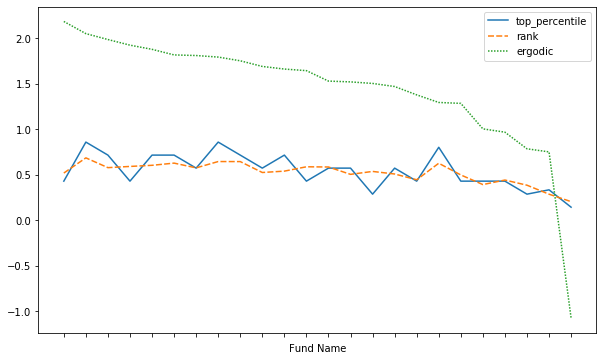

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(data=result.iloc[:, :3], sort=False)
plt.xticks(np.arange(len(result)), [])
plt.show()

In [52]:
df1 = mf_selector('../mf/equity-mid-cap.xlsx', year_from=2011, year_to=2018, percentile=50)
df1

,top_percentile,rank,ergodic,alpha
Fund Name,,,,
L&T Midcap Fund,0.750000,0.627314,0.916500,3.187728
Kotak Emerging Equity Fund Regular Plan,0.750000,0.608959,0.699125,2.781478
Edelweiss Mid Cap Fund - Regular Plan,0.750000,0.624415,0.869375,3.387728
Franklin India Prima Fund,0.750000,0.644569,1.098000,2.758978
ICICI Prudential Midcap Fund,0.750000,0.519528,0.478750,1.626478
Motilal Oswal Midcap 30 Fund - Regular Plan,0.750000,0.541667,1.057000,-0.813021
Invesco India Mid Cap Fund,0.750000,0.624741,1.367000,2.820228
Tata Midcap Growth Fund - Regular Plan,0.625000,0.584947,0.777000,1.955228
Sundaram Mid Cap Fund - Regular Plan,0.625000,0.529990,0.735625,1.318978


In [54]:
df2 = pd.read_excel('../mf/equity-mid-cap.xlsx', skiprows=5, index_col=0, sheet_name=1).apply(lambda c : pd.to_numeric(c, errors='coerce'))

In [55]:
df2.loc[df1.index, 2019]

Fund Name
L&T Midcap Fund                                        -0.15
Kotak Emerging Equity Fund Regular Plan                 8.86
Edelweiss Mid Cap Fund - Regular Plan                   5.15
Franklin India Prima Fund                               3.53
ICICI Prudential Midcap Fund                           -0.61
Motilal Oswal Midcap 30 Fund - Regular Plan             9.72
Invesco India Mid Cap Fund                              3.80
Tata Midcap Growth Fund - Regular Plan                  6.51
Sundaram Mid Cap Fund - Regular Plan                   -0.30
BNP Paribas Midcap Fund                                 5.21
SBI Magnum Midcap Fund                                  0.07
HDFC Mid-Cap Opportunities Fund                         0.20
UTI Mid Cap Fund - Regular Plan                        -0.19
Taurus Discovery (Midcap) Fund - Regular Plan           1.61
Quant Mid Cap Fund                                     -2.60
Sundaram Mid Cap Fund - Institutional Plan              0.51
Motilal Oswal 

In [56]:
df1['ergodic'].corr(df2.loc[df1.index, 2019])

0.21613308660059652

C:\Users\dsanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ergodic', ylabel='2019'>

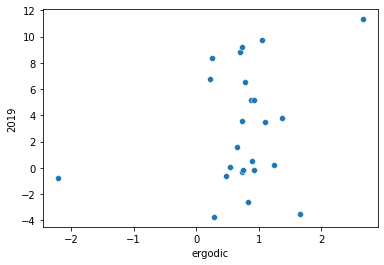

In [58]:
sns.scatterplot(df1['ergodic'], df2.loc[df1.index, 2019])